In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
from collections import Counter
#1
data=pd.read_csv(r"C:\Users\Lokesh\Downloads\IMDB-Movie-Data.csv")

In [ ]:
#2
data.head(5)
#rating~revenue~metascore

In [ ]:
#3
data.isnull().sum()

In [ ]:
#4
x=data['Revenue (Millions)'].mean()
data['Revenue (Millions)'].fillna(x,inplace=True)
x1=data['Metascore'].mean()
data['Metascore'].fillna(x,inplace=True)

In [14]:
#5
data[['Revenue (Millions)','Metascore','Votes','Rating']]

,Revenue (Millions),Metascore,Votes,Rating
0,333.130000,76.0,757074,8.1
1,126.460000,65.0,485820,7.0
2,138.120000,62.0,157606,7.3
3,270.320000,59.0,60545,7.2
4,325.020000,40.0,393727,6.2
...,...,...,...,...
995,82.956376,45.0,27585,6.2
996,17.540000,46.0,73152,5.5
997,58.010000,50.0,70699,6.2
998,82.956376,22.0,4881,5.6


In [15]:
#6
data['Runtime (Minutes)'].mean()

113.172

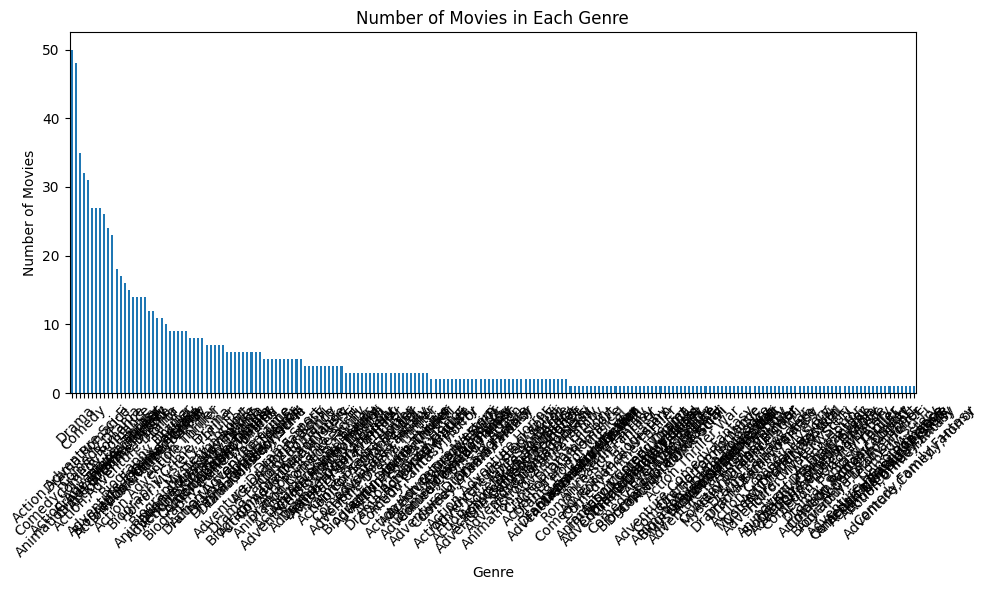

In [48]:
#7
genre_counts=data['Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



In [49]:
director=data['Director'].value_counts()
top5=director.head(5)
top5

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Name: Director, dtype: int64

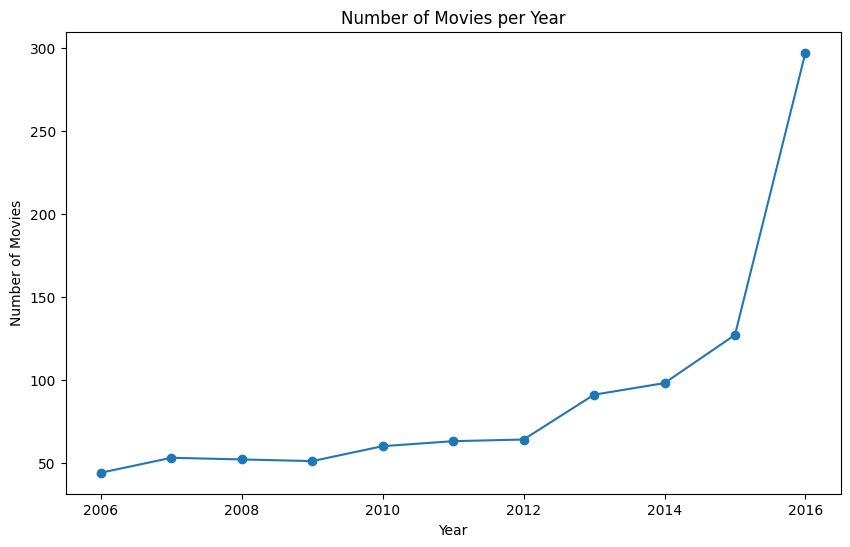

In [66]:
year=data['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(year.index, year.values, marker='o')
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

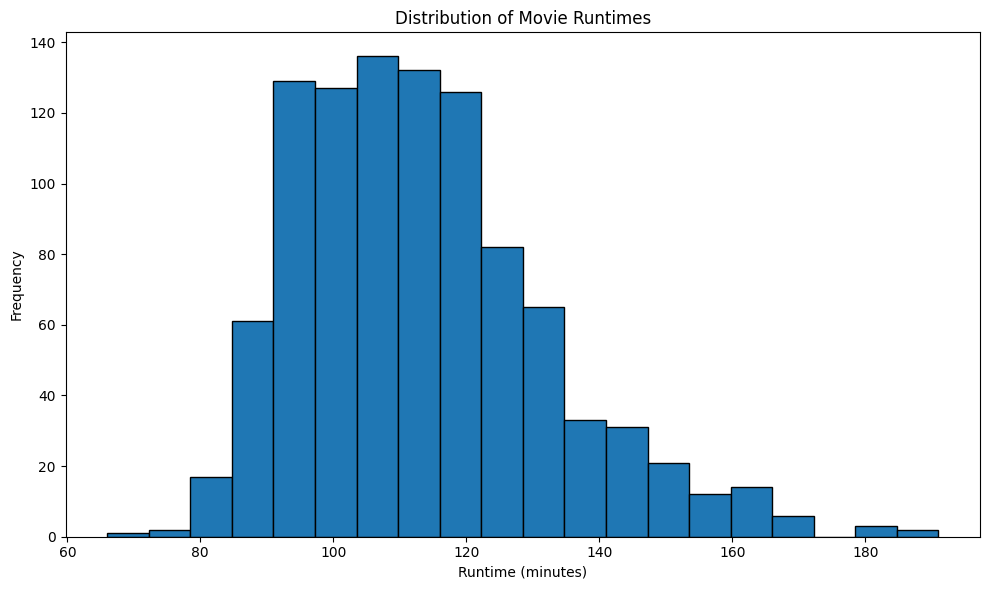

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(data['Runtime (Minutes)'], bins=20, edgecolor='k')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()

# Display the plot
plt.show()


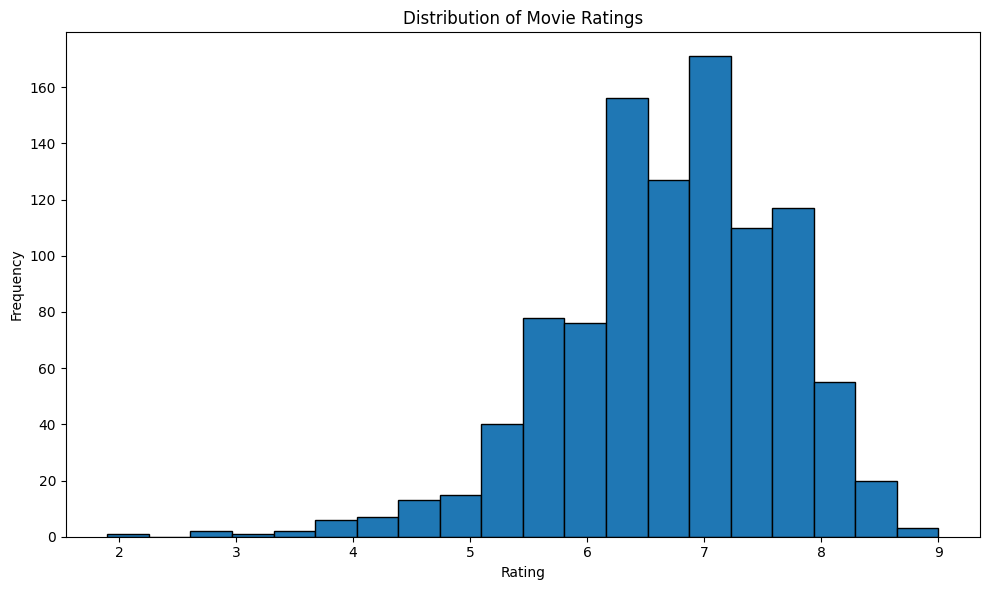

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=20, edgecolor='k')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

In [73]:
correlation_coefficient = data['Rating'].corr(data['Runtime (Minutes)'])
correlation_coefficient

0.3922142455250515

In [75]:
all_actors = data['Actors'].str.split(', ').explode()
actor_counts = all_actors.value_counts()
top_actors = actor_counts.head(3)
print(top_actors)


Mark Wahlberg    15
Brad Pitt        13
Hugh Jackman     13
Name: Actors, dtype: int64


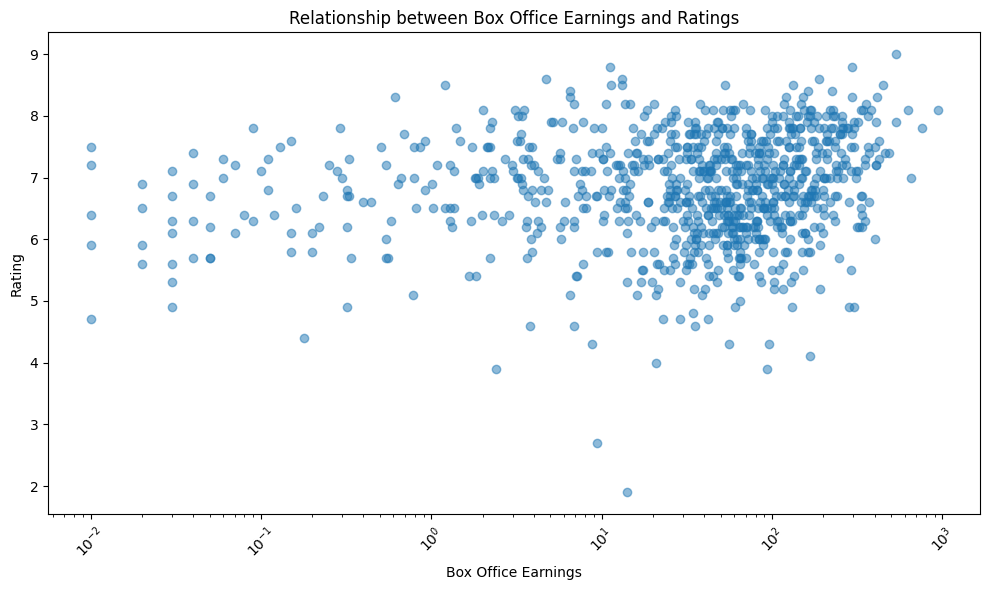

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Revenue (Millions)'], data['Rating'], alpha=0.5)
plt.title('Relationship between Box Office Earnings and Ratings')
plt.xlabel('Box Office Earnings')
plt.ylabel('Rating')
plt.xscale('log') 
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


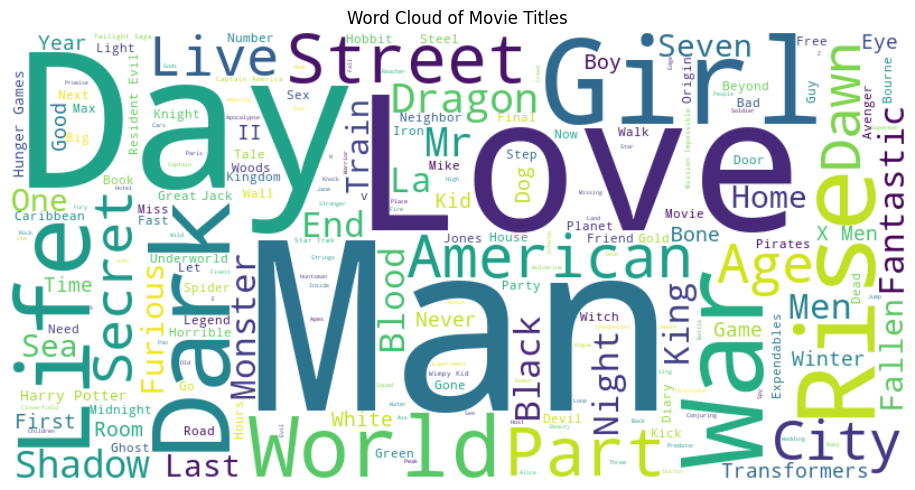

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

titles = data['Title']

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(titles))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Titles')
plt.axis('off')
plt.tight_layout()

plt.show()


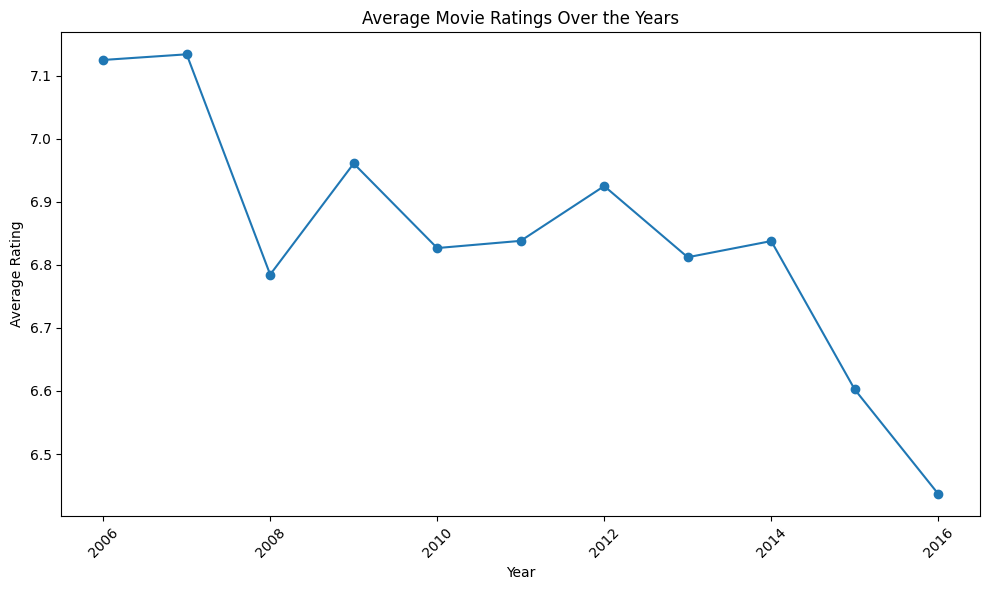

In [82]:
average_ratings = data.groupby('Year')['Rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_ratings.index, average_ratings.values, marker='o')
plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
#There is Downward Trend in average ratings over the years

In [85]:
director_actor_pairs = pd.DataFrame({'Director':data['Director'], 'Actor': data['Actors']})

common_pairs = director_actor_pairs.groupby(['Director', 'Actor']).size().reset_index(name='Count')
most_common_pairs = common_pairs.sort_values(by='Count', ascending=False).head()

print(most_common_pairs)

             Director                                              Actor  \
642       Michael Bay  Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...   
231       David Yates  Daniel Radcliffe, Emma Watson, Rupert Grint, M...   
298  Francis Lawrence  Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...   
0          Aamir Khan  Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...   
659    Micheal Bafaro  Anna Hutchison, Andrea Whitburn, Jennifer Koen...   

     Count  
642      2  
231      2  
298      2  
0        1  
659      1  


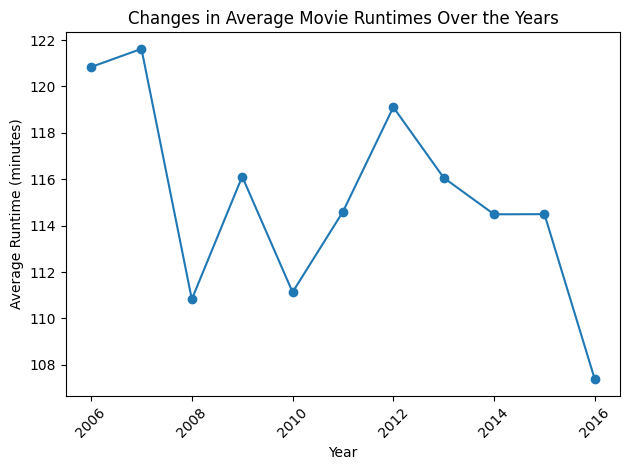

In [89]:
average_runtimes = data.groupby('Year')['Runtime (Minutes)'].mean()

plt.figure()
plt.plot(average_runtimes.index, average_runtimes.values, marker='o')
plt.title('Changes in Average Movie Runtimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\Lokesh\AppData\Local\Temp\ipykernel_10640\1628174259.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

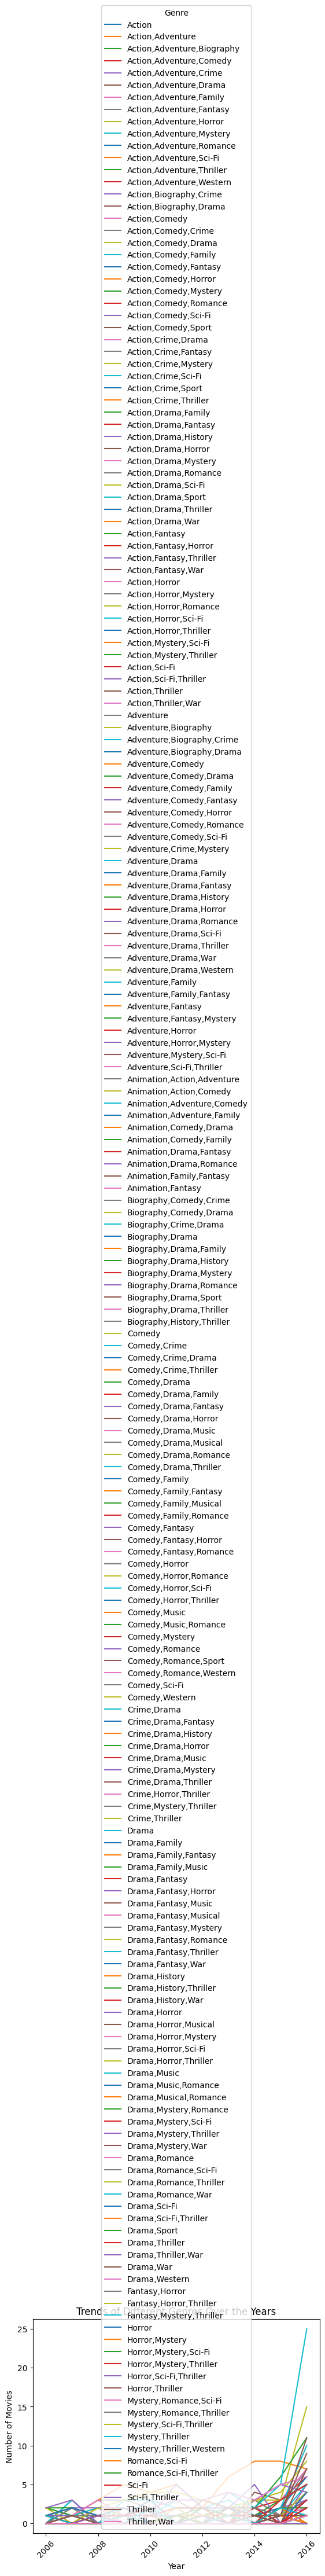

In [102]:
x=list(data['Genre'])
genres_df = pd.DataFrame({'Year': data['Year'], 'Genre':x})
genre_counts_by_year = genres_df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

plt.figure()
genre_counts_by_year.plot(kind='line')
plt.title('Trends of Different Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

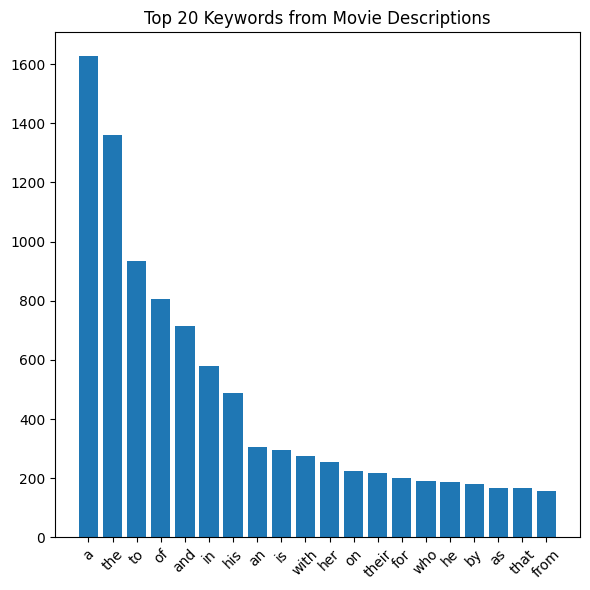

In [100]:
all_descriptions = ' '.join(data['Description'].dropna())

# Tokenize words and remove punctuation
translator = str.maketrans('', '', string.punctuation)
words = all_descriptions.lower().translate(translator).split()

# Calculate word frequency using Counter
word_counts = Counter(words)

# Get the most common keywords
num_keywords = 20  # Change this value to visualize more or fewer keywords
most_common_keywords = word_counts.most_common(num_keywords)

# Separate keywords and counts for plotting
keywords, counts = zip(*most_common_keywords)

# Plot the top N keywords
plt.figure(figsize=(6, 6))
plt.bar(keywords, counts)
plt.title(f'Top {num_keywords} Keywords from Movie Descriptions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

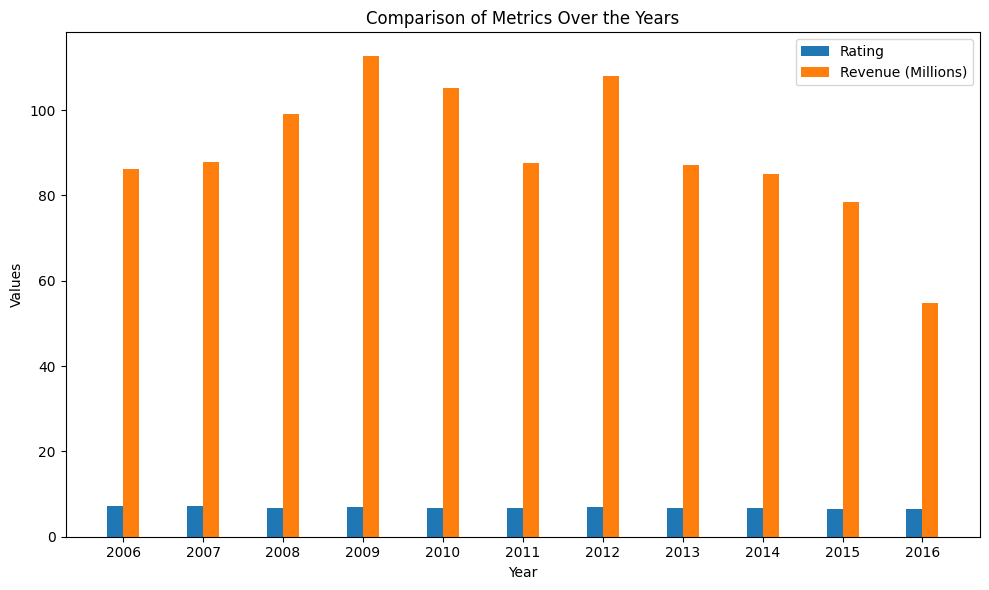

In [105]:
metrics = ['Rating', 'Revenue (Millions)']

# Group the data by year and calculate the mean for each metric
average_metrics = data.groupby('Year')[metrics].mean().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = average_metrics.index

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, average_metrics[metric], width=bar_width, label=metric)

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Comparison of Metrics Over the Years')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, average_metrics['Year'])
plt.legend()
plt.tight_layout()

plt.show()



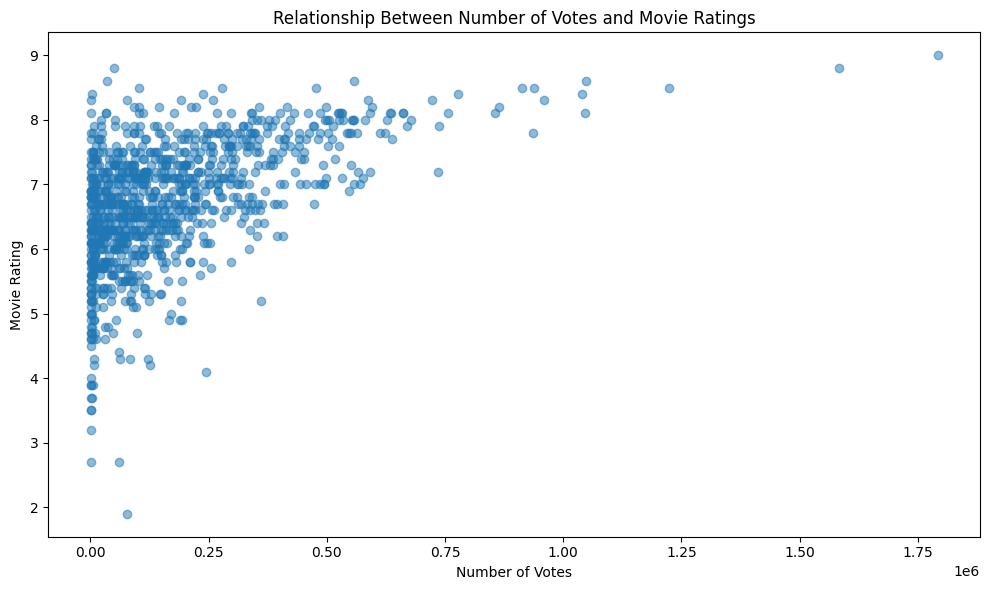

In [111]:
ratings = data['Rating']
votes = data['Votes']

plt.figure(figsize=(10, 6))
plt.scatter(votes, ratings, alpha=0.5)  
plt.title('Relationship Between Number of Votes and Movie Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Rating')
plt.tight_layout()

plt.show()


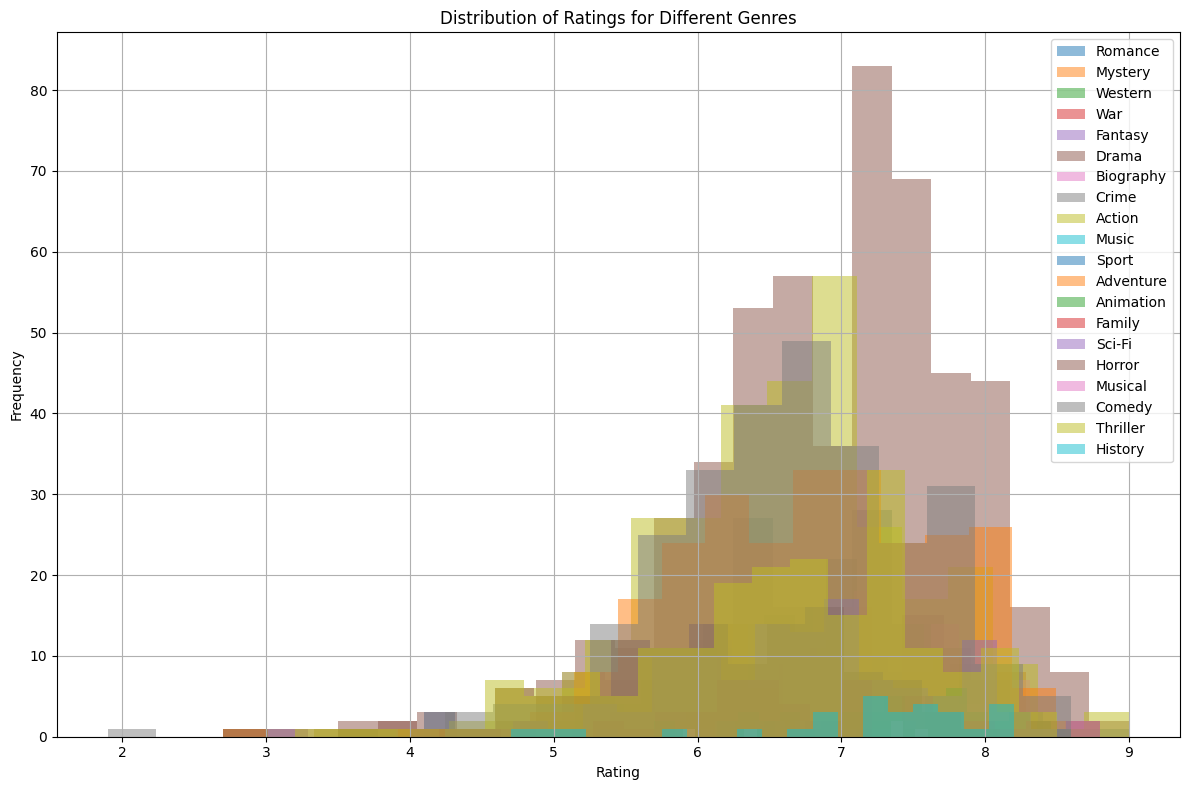

In [126]:
data['Genre'] = data['Genre'].str.split(',')

# Create a separate histogram for each genre
unique_genres = set(genre for genres in data['Genre'] for genre in genres)

plt.figure(figsize=(12, 8))

for genre in unique_genres:
    genre_ratings = data[data['Genre'].apply(lambda x: genre in x)]['Rating']
    plt.hist(genre_ratings, bins=20, alpha=0.5, label=genre)

plt.title('Distribution of Ratings for Different Genres')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

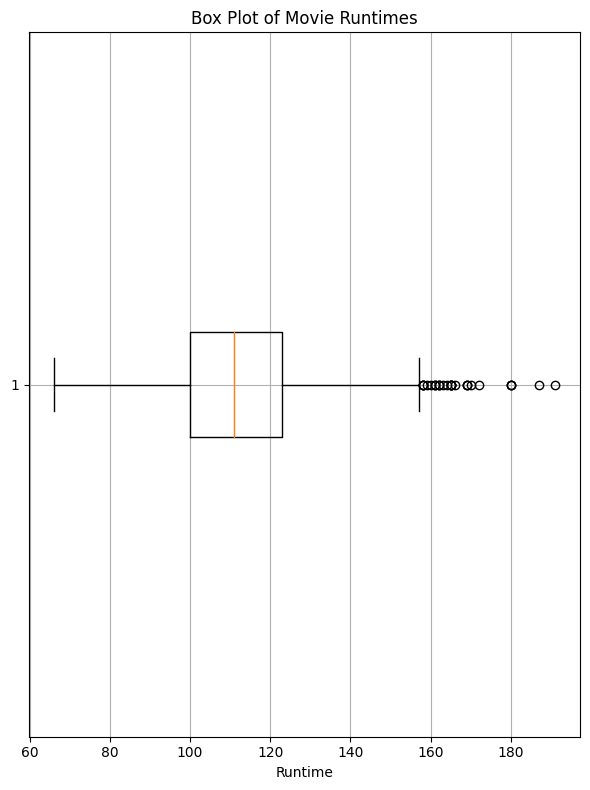

In [129]:
runtime_data = data['Runtime (Minutes)']

# Create a box plot to identify outliers
plt.figure(figsize=(6, 8))
plt.boxplot(runtime_data, vert=False)
plt.title('Box Plot of Movie Runtimes')
plt.xlabel('Runtime')
plt.grid(True)
plt.tight_layout()

plt.show()

# Calculate the IQR for runtime
Q1 = runtime_data.quantile(0.25)
Q3 = runtime_data.quantile(0.75)
IQR = Q3 - Q1

# Set upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Cap the extreme values
capped_runtime_data = runtime_data.clip(lower=lower_bound, upper=upper_bound)

# Replace the original runtime column with capped values
data['Runtime'] = capped_runtime_data